In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Delhivery\Dataset\delhivery.csv')

In [3]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
data.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [7]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [8]:
data[data.isnull()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data[data['source_name'].isnull()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


# Column wise Analysis

In [14]:
# data
df = pd.DataFrame()

## Trip_creation_time

In [25]:
df['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
df

,trip_creation_date,trip_creation_hour,trip_creation_time
0,2018-09-20,2,2018-09-20 02:35:36.476840
1,2018-09-20,2,2018-09-20 02:35:36.476840
2,2018-09-20,2,2018-09-20 02:35:36.476840
3,2018-09-20,2,2018-09-20 02:35:36.476840
4,2018-09-20,2,2018-09-20 02:35:36.476840
...,...,...,...
144862,2018-09-20,16,2018-09-20 16:24:28.436231
144863,2018-09-20,16,2018-09-20 16:24:28.436231
144864,2018-09-20,16,2018-09-20 16:24:28.436231
144865,2018-09-20,16,2018-09-20 16:24:28.436231


In [21]:
df['trip_creation_time'].dt.date.nunique()

22

Dataset Contains 22 days of data. Hence granular level of year, month and day is not required

In [26]:
df['trip_creation_date'] = df['trip_creation_time'].dt.date
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour
df.drop('trip_creation_time', axis=1, inplace=True)
df

,trip_creation_date,trip_creation_hour
0,2018-09-20,2
1,2018-09-20,2
2,2018-09-20,2
3,2018-09-20,2
4,2018-09-20,2
...,...,...
144862,2018-09-20,16
144863,2018-09-20,16
144864,2018-09-20,16
144865,2018-09-20,16


## route_schedule_uuid

In [66]:
split_0 = data['route_schedule_uuid'].str.split("::").apply(lambda x: x[0])
split_1 = data['route_schedule_uuid'].str.split(":").apply(lambda x: x[2])
split_2 = data['route_schedule_uuid'].str.split(":").apply(lambda x: x[3])

In [67]:
print(split_0.nunique(), split_1.nunique(), split_2.nunique())

1 1 1504


There is no significant information present in this column and hence can be dropped 

# route_type

In [68]:
data['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

In [72]:
df[['Cart', 'FTL']] = pd.get_dummies(data['route_type'], columns=['route_type'])

In [74]:
df['Cart'].value_counts()

0    99660
1    45207
Name: Cart, dtype: int64

## trip_uuid

In [76]:
data['trip_uuid'].nunique()

14817

In [77]:
# For grouping Trip ID is required
df['trip_uuid'] = data['trip_uuid']

## source_center

In [ ]:
data['source_center'].iloc[0]

In [176]:
data['source_center'].apply(lambda x: x[:3]).unique()

array(['IND'], dtype=object)

In [178]:
data['source_center'].apply(lambda x: x[-3:]).unique()

array(['AAA', 'AAB', 'AAG', 'ACA', 'AAC', 'AAD', 'A1B', 'ACK', 'ACB',
       'ABA', 'AAE', 'AAM', 'AFT', 'AAN', 'AAR', 'ACT', 'AAK', 'AFJ',
       'ADV', 'AAF', 'ABD', 'AFG', 'AAL', 'ACN', 'ABG', 'AAJ', 'AAI',
       'AEM', 'AEL', 'AET', 'AAS', 'AFR', 'AAZ', 'AFF', 'AAH', 'ADM',
       'AAQ'], dtype=object)

In [179]:
data['source_center'].apply(lambda x: x[3:-3:]).nunique()

1390

- All the packages starts from IND possibly India
- Unique Id for each center, hence not required for further analysis

## source_name

In [81]:
# source_name
data['source_name'].iloc[0]

'Anand_VUNagar_DC (Gujarat)'

In [150]:
# Different ways of source name entered in dataset
data['source_name'].fillna("Unk_Unk_Unk (Unk)").str.count("_").value_counts()

2    118836
1     12543
3     11381
0      2107
Name: source_name, dtype: int64

Four different variety of source name are given in the dataset

In [148]:
for i in range(4):
    print(data[data['source_name'].fillna("Unk_Unk_Unk (Unk)").str.count("_") == i]['source_name'].iloc[0])

Haridwar (Uttarakhand)
LowerParel_CP (Maharashtra)
Anand_VUNagar_DC (Gujarat)
Kanpur_Central_H_6 (Uttar Pradesh)


First string before underscore is City and inside brackets is state

In [157]:
def splitlocation(x):
    if x.count("_"):
        temp1 = x.split("_")
        city = temp1[0]
        temp2 = temp1[-1].split("(")
        state = temp2[1].replace(")", "").strip()
    else:
        temp1 = x.split("(")
        city = temp1[0].strip()
        state = temp1[-1].replace(")", "").strip()
    return city, state

In [159]:
city_state = data['source_name'].fillna("Unk_Unk_Unk (Unk)").apply(splitlocation)

In [161]:
df['source_city'] = city_state.apply(lambda x: x[0])
df['source_state'] = city_state.apply(lambda x: x[1])

In [165]:
df.head()

,trip_creation_date,trip_creation_hour,Cart,FTL,trip_uuid,source_city,source_state
0,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat
1,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat
2,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat
3,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat
4,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat


## destination_center

In [180]:
data['destination_center'].iloc[0]

'IND388620AAB'

In [181]:
data['destination_center'].apply(lambda x: x[:3]).unique()

array(['IND'], dtype=object)

In [182]:
data['destination_center'].apply(lambda x: x[-3:]).unique()

array(['AAB', 'AAA', 'AAD', 'ACA', 'AAE', 'AAC', 'A1B', 'AAF', 'ACB',
       'ABA', 'AAG', 'AFT', 'AAM', 'AAJ', 'AAH', 'AAL', 'AAR', 'ABD',
       'ACS', 'ACO', 'AEL', 'AAK', 'AFS', 'AET', 'AAS', 'ACN', 'A1A',
       'ADM', 'AFF', 'AFJ', 'AAZ', 'A1C'], dtype=object)

In [183]:
data['destination_center'].apply(lambda x: x[3:-3:]).nunique()

1384

- All the packages starts from IND possibly India
- Unique Id for each center, hence not required for further analysis

## destination_name

In [166]:
# Different ways of source name entered in dataset
data['destination_name'].fillna("Unk_Unk_Unk (Unk)").str.count("_").value_counts()

2    117278
1     13127
3     12021
0      2441
Name: destination_name, dtype: int64

In [167]:
for i in range(4):
    print(data[data['destination_name'].fillna("Unk_Unk_Unk (Unk)").str.count("_") == i]['destination_name'].iloc[0])

Haridwar (Uttarakhand)
Jagraon_DC (Punjab)
Khambhat_MotvdDPP_D (Gujarat)
Kanpur_Central_H_6 (Uttar Pradesh)


In [168]:
city_state = data['destination_name'].fillna("Unk_Unk_Unk (Unk)").apply(splitlocation)
df['dest_city'] = city_state.apply(lambda x: x[0])
df['dest_state'] = city_state.apply(lambda x: x[1])

In [170]:
df.head()

,trip_creation_date,trip_creation_hour,Cart,FTL,trip_uuid,source_city,source_state,dest_city,dest_state
0,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat
1,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat
2,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat
3,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat
4,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat


## Trip start time and Trip end time 
- Not required, as the timing analysis can be performed with other columns

In [209]:
df['trip_time'] = (pd.to_datetime(data['od_end_time']) - pd.to_datetime(data['trip_creation_time'])).dt.seconds // 60

## start_scan_to_end_scan

In [185]:
df['del_time'] = data['start_scan_to_end_scan']

## is_cutoff, cutoff_factor, cutoff_timestamp

In [187]:
data['is_cutoff'].value_counts()

True     118749
False     26118
Name: is_cutoff, dtype: int64

In [188]:
data['cutoff_factor'].value_counts().

22      13157
9       12378
44       8334
18       8263
66       5795
        ...  
245         1
734         1
1149        1
412         1
275         1
Name: cutoff_factor, Length: 501, dtype: int64

<Axes: xlabel='is_cutoff', ylabel='cutoff_factor'>

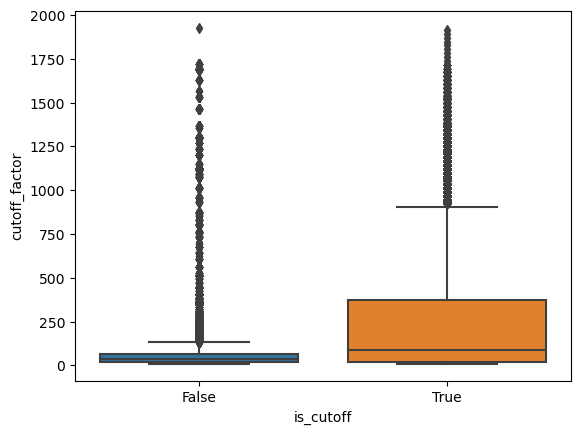

In [193]:
sns.boxplot(data = data, y = 'cutoff_factor', x = 'is_cutoff')

In [194]:
df[['is_cutoff','cutoff_factor']] = data[['is_cutoff','cutoff_factor']]

In [189]:
data['cutoff_timestamp']

0                2018-09-20 04:27:55
1                2018-09-20 04:17:55
2         2018-09-20 04:01:19.505586
3                2018-09-20 03:39:57
4                2018-09-20 03:33:55
                     ...            
144862           2018-09-20 21:57:20
144863           2018-09-20 21:31:18
144864           2018-09-20 21:11:18
144865           2018-09-20 20:53:19
144866    2018-09-20 16:24:28.436231
Name: cutoff_timestamp, Length: 144867, dtype: object

In [190]:
df['cufoff_date'] = pd.to_datetime(data['cutoff_timestamp']).dt.date
#df['cutoff_time'] = pd.to_datetime(data['cutoff_timestamp']).dt.hour

In [ ]:
df['cutoff_time'] = pd.to_datetime(data['cutoff_timestamp']).dt.hour

## actual_distance_to_destination

In [221]:
data[['actual_distance_to_destination', 'osrm_distance']].head()

,actual_distance_to_destination,osrm_distance
0,10.435660,11.9653
1,18.936842,21.7243
2,27.637279,32.5395
3,36.118028,45.5620
4,39.386040,54.2181


In [223]:
data[data['osrm_distance'] < data['actual_distance_to_destination']].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
77666,training,2018-09-12 19:52:50.332484,thanos::sroute:c0fc2d36-84dc-406b-b11f-5ebf7eb...,Carting,trip-153678197033223393,IND262001AAA,Pilibhit_ViksClny_D (Uttar Pradesh),IND262122AAB,Puranpur_MdothdRD_D (Uttar Pradesh),2018-09-13 04:05:03.179947,...,2018-09-13 05:00:08,11.219466,11.0,12.0,11.2178,0.916667,11.0,12.0,11.2178,0.916667
103033,training,2018-09-12 19:33:12.560599,thanos::sroute:b692be92-80ce-4280-989f-5d98eca...,Carting,trip-153678079256033748,IND742401AAA,Ghanashyampur_NditaDPP_D (West Bengal),IND742101AAC,Baharampur_Chuanpur_I (West Bengal),2018-09-13 03:44:54.873874,...,2018-09-13 06:35:56,10.109174,24.0,9.0,9.8790,2.666667,24.0,9.0,9.8790,2.666667


In [224]:
# As the correct distance on road is captured in osrm distance, hence actual distance doesn't reflect any insights
# The above check also verifies that actual distance is lesser in all cases except 2

In [225]:
df.head()

,trip_creation_date,trip_creation_hour,Cart,FTL,trip_uuid,source_city,source_state,dest_city,dest_state,del_time,cufoff_date,is_cutoff,cutoff_factor,trip_time
0,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat,86.0,2018-09-20,True,9,132
1,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat,86.0,2018-09-20,True,18,132
2,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat,86.0,2018-09-20,True,27,132
3,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat,86.0,2018-09-20,True,36,132
4,2018-09-20,2,1,0,trip-153741093647649320,Anand,Gujarat,Khambhat,Gujarat,86.0,2018-09-20,False,39,132


## actual_time, osrm_time, osrm_distance

- Actual time, OSRM time, OSRM Distance is cumulated version of segment actual time, segment osrm time, segment osrm distance hence ignoring it

## segment_actual_time, segment_osrm_time, segment_osrm_distance

In [227]:
df['segment_actual_time'] = data['segment_actual_time']
df['segment_osrm_time'] = data['segment_osrm_time']
df['segment_osrm_distance'] = data['segment_osrm_distance']

## osrm_time

In [232]:
data[['trip_uuid','factor','segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']].head(10)

,trip_uuid,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,trip-153741093647649320,1.272727,14.0,11.0,11.9653,1.272727
1,trip-153741093647649320,1.200000,10.0,9.0,9.7590,1.111111
2,trip-153741093647649320,1.428571,16.0,7.0,10.8152,2.285714
3,trip-153741093647649320,1.550000,21.0,12.0,13.0224,1.750000
4,trip-153741093647649320,1.545455,6.0,5.0,3.9153,1.200000
5,trip-153741093647649320,1.363636,15.0,11.0,12.1171,1.363636
6,trip-153741093647649320,2.588235,28.0,6.0,9.1719,4.666667
7,trip-153741093647649320,2.241379,21.0,11.0,14.5362,1.909091
8,trip-153741093647649320,1.948718,10.0,10.0,11.3648,1.000000
9,trip-153741093647649320,2.266667,26.0,6.0,6.0434,4.333333


## factor and segment_factor

In [234]:
#After analysis it is identified that Factor = actual time / Osrm Time
#setment_Factor = segment_actual_time / segment_osrm_time
#Hence ignored